# Clustering

In [17]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

wine = load_wine()
wineDF = pd.DataFrame(data=wine.data,columns=wine.feature_names)
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [22]:
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300,random_state=0).fit(wineDF)
print(kmeans.labels_)
wineDF['target'] = wine.target
wineDF['cluster'] = kmeans.labels_
wine_result = wineDF.groupby(['target','cluster'])['alcohol'].count()
print(wine_result)

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]
target  cluster
0       1          46
        2          13
1       0          50
        1           1
        2          20
2       0          19
        2          29
Name: alcohol, dtype: int64


In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(wine.data)
pca_scaled = pca.fit_transform(MinMaxScaler().fit_transform(wine.data))
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300,random_state=0).fit(pca_scaled)
wineDF['pca_x'] = pca_transformed[:,0]
wineDF['pca_y'] = pca_transformed[:,1]
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,pca_x,pca_y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1,318.562979,21.492131
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1,303.097420,-5.364718
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1,438.061133,-6.537309
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1,733.240139,0.192729
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,2,-11.571428,18.489995


Text(0.5, 1.0, '3 Clusters Visualization by 2 PCA Components')

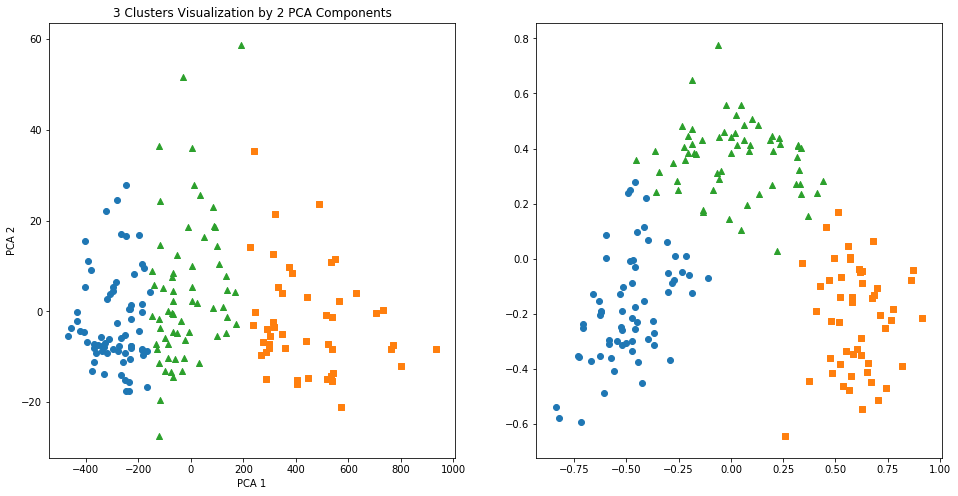

In [38]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
marker_ind = [1,2,3]
scaled_ind = [1,2,3]
markers = ['o','s','^']
for i in range(3):
    marker_ind[i] = wineDF[wineDF['cluster']==i].index
    scaled_ind[i] = kmeans.labels_ == i
    ax[0].scatter(x=wineDF.loc[marker_ind[i],'pca_x'],y=wineDF.loc[marker_ind[i],'pca_y'],marker=markers[i])
    ax[1].scatter(x=pca_scaled[scaled_ind[i],0],y=pca_scaled[scaled_ind[i],1],marker=markers[i])
ax[0].set_xlabel('PCA 1');ax[0].set_ylabel('PCA 2');ax[0].\
set_title('3 Clusters Visualization by 2 PCA Components')

In [41]:
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples, silhouette_score

wine = load_wine()
wineDF = pd.DataFrame(data = wine.data, columns= wine.feature_names)
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(wineDF)
wineDF['cluster'] = kmeans.labels_

score_samples = silhouette_samples(wine.data,wineDF['cluster'])
print(score_samples.shape)
wineDF['silhouette_coeff'] = score_samples
avg_score = silhouette_score(wine.data,wineDF['cluster'])
print(avg_score)


(178,)
0.5711381937868844


In [43]:
wineDF.groupby(['cluster'])['silhouette_coeff'].mean()

cluster
0    0.621967
1    0.555871
2    0.526144
Name: silhouette_coeff, dtype: float64

In [45]:
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs

x,y = make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.8)
meanshift = MeanShift(bandwidth=1.0)
cluster_labels = meanshift.fit_predict(x)
print(np.unique(cluster_labels))


[0 1 2]


In [46]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(x,quantile=0.2)
print(bandwidth)

1.4218386532464569


In [47]:
clusterDF = pd.DataFrame(x,columns=['ftr1','ftr2'])
clusterDF['target'] = y
meanshift = MeanShift(bandwidth = np.floor(bandwidth))
cluster_labels = meanshift.fit_predict(x)
print(np.unique(cluster_labels))

[0 1 2]


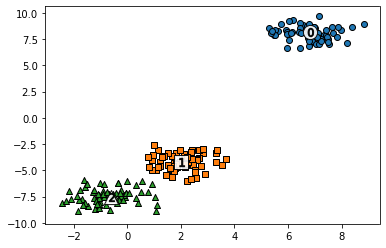

In [51]:
clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','x','*']
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',marker = markers[label])
    plt.scatter(x = center_x_y[0],y=center_x_y[1],s=200,color='white',edgecolor='k',alpha=0.9,marker=\
               markers[label])
    plt.scatter(x = center_x_y[0],y=center_x_y[1],s=70,color='k',edgecolor='k',alpha=0.9,marker=\
               '$%d$' % label)
plt.show()
    

In [52]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       2                  67
1       0                  67
2       1                  66
Name: meanshift_label, dtype: int64


In [73]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(x)
gmm_labels = gmm.predict(x)
df = pd.DataFrame(np.concatenate((gmm_labels.reshape(-1,1),y.reshape(-1,1)),axis=1),columns=['gmm_label','true_la\
bel'])
df.groupby('true_label')['gmm_label'].value_counts()

true_label  gmm_label
0           0            67
1           1            67
2           2            66
Name: gmm_label, dtype: int64

In [95]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=30,min_samples=8,metric='euclidean')
dbscan_labels = dbscan.fit_predict(wine.data)
wineDF['dbscan_cluster'] =dbscan_labels
wineDF['target'] = wine.target
wine_result = wineDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(wine_result)


target  dbscan_cluster
0       -1                21
         0                16
         2                11
         1                 5
         3                 5
         4                 1
1        4                59
        -1                 6
         1                 4
         3                 2
2        4                37
         1                 6
         3                 5
Name: dbscan_cluster, dtype: int64
